In [ ]:

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture
from sklearn.metrics.cluster import adjusted_rand_score

In [ ]:
#Importing and reading dataset

irisdata = pd.read_csv("/content/drive/MyDrive/iris.csv")

In [ ]:
x = irisdata.iloc[:,:4]
y = irisdata.iloc[:,-1]

In [ ]:
#Standardizing Dataset useing sklearn

sc = StandardScaler()
sc.fit(x)
std_array = sc.transform(x)
X = pd.DataFrame(std_array,columns = x.columns)

In [ ]:
#Gaussian Mixture model

cluster = GaussianMixture(n_components=3)
cluster.fit(X)
y_pred = cluster.predict(X)
score = adjusted_rand_score(y,y_pred)
score

0.9038742317748124

In [ ]:
#Using PCA to visualize data

from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
pca_array = pca.fit_transform(irisdata.drop(['variety'],axis = 1))
pca_df = pd.DataFrame(pca_array,columns=["PC1","PC2"])
pca_df.head()

,PC1,PC2
0,-2.684126,0.319397
1,-2.714142,-0.177001
2,-2.888991,-0.144949
3,-2.745343,-0.318299
4,-2.728717,0.326755


In [ ]:
col_code = {0:"yellow",1:"darkblue",2:"green"}
label = {0:"setosa",1:"versicolor",2:"virginica"}

pca_df["labels"] = pd.DataFrame(y_pred)
groups = pca_df.groupby('labels')

groups.mean()

,PC1,PC2
labels,,
0,-2.642415,0.190885
1,0.452518,-0.248189
2,2.031954,0.029531


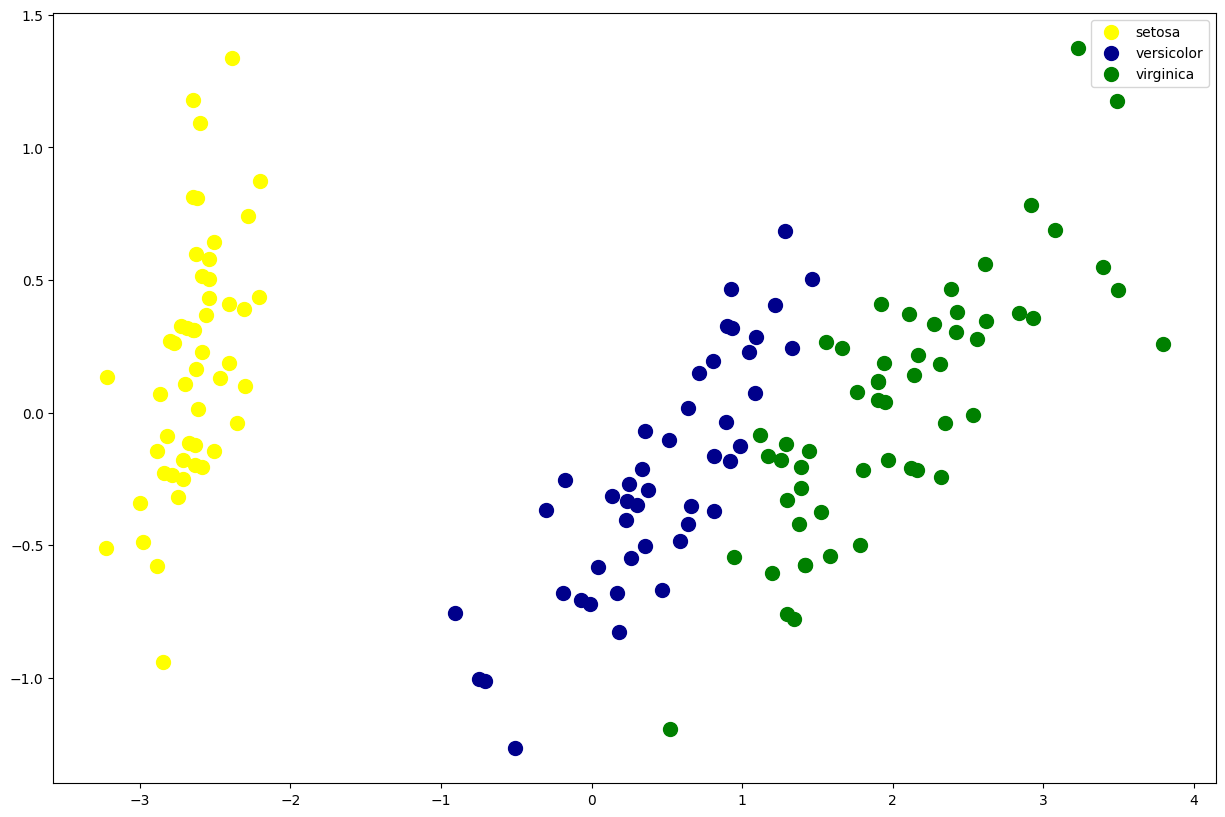

In [ ]:
fig, ax =plt.subplots(1,1,figsize =(15,10))
for name, group in groups:
    ax.plot(group.PC1,group.PC2,color =col_code[name],label =label[name],marker='o',linestyle='',ms=10)
ax.legend()
plt.show()